Note: Use this template to develop your project. Do not change the steps. For each step, you may add additional cells if needed.

## Predictive Modelling with Cancer Information

<b>Machine Learning & Computational Intelligence</b>
<b>Training the Weights of A Linear Regression Model</b><br>

#### Import Libraries

Importing standard modules; pandas, numply, matplotlib

In [1]:
import pandas as pd # Import pandas library for data manipulation and analysis
import numpy as np # Import numpy library for array operations
import matplotlib.pyplot as plt # Import pyplot module for creating visualizations
%config Completer.use_jedi=False # Disable the Jedi autocompletion engine

#### Load the dataset

In [2]:
# Read the CSV file into pandas DataFrame
dataset = pd.read_csv('assignment1_dataset.csv')
dataset.head() # Display the first few rows (5) of the dataset

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075


#### Define the loss function

Calculate the loss using the mean squared error with the formula: $J_{mse}(y,\hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y^i - \hat{y}^i)^2$

In [3]:
# Define mean squared error loss function
def loss_fn(y, yhat):
    loss = (1 / len(y)) * np.sum((yhat - y)**2)
    return loss

#### Define function to perform prediction

Since the dataset is a multivariate linear regression, the model is expressed as: 
$ \hat{y} = \hat{f}(\mathbf{x}) = \sum_{j=0}^{d} w_j x_j$
where $w_j x_j$ is the inner product between the model's parameters (or weights) and the input features


In [4]:
# Define predict function
def predict(w, X):
    yhat = np.dot(X, w)
    return yhat

#### Define function for model training
The training loss value for each epoch of the training loop is displayed. This function requires four parameters:<br><br>
$X$ = input features<br>
$y$ = responses<br>
alpha = learning rate<br>
max_epoch = maximum epochs<br>

A <b>column of ones</b> is added to the input features as the <b>bias/intercept term</b>. It is an additional parameter in linear regression models that allows the model to capture the inherent bias or offset in the data. It represents the expected target value when all the input features are zero.

In [5]:
# Define the training function
def train_model(X, y, alpha, max_epoch):
    
    num_samples = X.shape[0]
    num_features = X.shape[1]
    
    # Add a column of ones to X for the bias term
    X = np.c_[np.ones(num_samples), X]
    
    # Initialize weights and loss history
    w = np.zeros(num_features + 1)
    hist_loss = []
    
    # Loop until the maximum iteration assigned
    for epoch in range(max_epoch + 1):
        
        # Compute predicted values and loss
        yhat = predict(w, X)
        loss = loss_fn(y, yhat)
        
        # Compute gradient and update weights
        gradient = np.dot(X.T, yhat - y) / num_samples
        w = w - (alpha * gradient)
        
        # Store loss for plotting
        hist_loss.append(loss)
        
        # Display training loss for each epoch
        print(f"Epoch {epoch + 1}/{max_epoch} - Training loss: {loss:.3f}")
        
    return w, hist_loss

#### Split the dataset
The training and test is split using the ratio 8:2.

In [6]:
from sklearn.model_selection import train_test_split

# Assume the target variable is in a column called "target"
X = dataset[['f1','f2','f3','f4','f5']]  # Drop the target column to get the feature matrix
y = dataset['response']  # Get the target vector

# Assume X and y are your feature matrix and target vector, respectively
# Split the dataset into training and testing sets with ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 5)
(800,)
(200, 5)
(200,)


#### Train the model

In [7]:
# Train the model on the training data using the specified learning rate and max epoch
w, hist_loss = train_model(X_train, y_train, alpha=0.003, max_epoch=4000)

Epoch 1/4000 - Training loss: 1721.307
Epoch 2/4000 - Training loss: 1710.371
Epoch 3/4000 - Training loss: 1699.506
Epoch 4/4000 - Training loss: 1688.711
Epoch 5/4000 - Training loss: 1677.986
Epoch 6/4000 - Training loss: 1667.330
Epoch 7/4000 - Training loss: 1656.744
Epoch 8/4000 - Training loss: 1646.226
Epoch 9/4000 - Training loss: 1635.776
Epoch 10/4000 - Training loss: 1625.394
Epoch 11/4000 - Training loss: 1615.078
Epoch 12/4000 - Training loss: 1604.830
Epoch 13/4000 - Training loss: 1594.648
Epoch 14/4000 - Training loss: 1584.532
Epoch 15/4000 - Training loss: 1574.482
Epoch 16/4000 - Training loss: 1564.496
Epoch 17/4000 - Training loss: 1554.575
Epoch 18/4000 - Training loss: 1544.718
Epoch 19/4000 - Training loss: 1534.925
Epoch 20/4000 - Training loss: 1525.196
Epoch 21/4000 - Training loss: 1515.529
Epoch 22/4000 - Training loss: 1505.925
Epoch 23/4000 - Training loss: 1496.384
Epoch 24/4000 - Training loss: 1486.903
Epoch 25/4000 - Training loss: 1477.485
Epoch 26/

#### Display the estimated weights

In [8]:
bias_weight = w[0] # Extract the bias weight from the weight vector, w

# Create a DataFrame to store the feature names and their corresponding weights
input_feature_weights = pd.DataFrame(np.array((X_train.columns, w[1:])).T,
columns=['Features', 'Estimated Weights']) 

# Print the weightage of the bias term, w0
print('w0:', bias_weight)

w0: 9.580977493085337


In [9]:
# Print the weights corresponding to the input features
input_feature_weights

,Features,Estimated Weights
0,f1,11.816338
1,f2,-0.150064
2,f3,-0.091679
3,f4,36.783376
4,f5,0.144462


#### Display the training loss against epoch graph

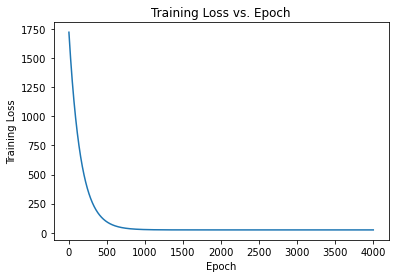

In [10]:
# Plot the training loss over epochs
plt.plot(hist_loss)
plt.title("Training Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.show()

#### Predict the test set

In [11]:
X_test = np.c_[np.ones(X_test.shape[0]), X_test] # Add a column of ones to X_test for the bias term

y_pred = predict(w, X_test) # Make predictions on the test data

y_pred[0:5] # Display the predicted values

array([  3.60583909, -13.23655238, -22.02080053,  -0.16743689,
        56.4482996 ])

In [12]:
y_test[0:5] # Compare to the actual values

521     3.095749
737   -10.581404
740   -28.364366
660     1.710863
411    57.922620
Name: response, dtype: float64

#### Display the r2 score, mean squared error and mean absolute error

In [13]:
# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model using various metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-Squared Error:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.127450225625097
Mean Squared Error: 26.878225548354138
R-Squared Error: 0.9841559527812248


#### Display the predicted value against actual value graph

This graph is used to visually evaluate the performance of this regression model. From this graph, we can see that the predicted values align closely with the actual values. This indicates that the model is performing well and accurately predicting the target variable.<br><br>
The red line is plotted to show that a perfect prediction would all fall on this specific line.

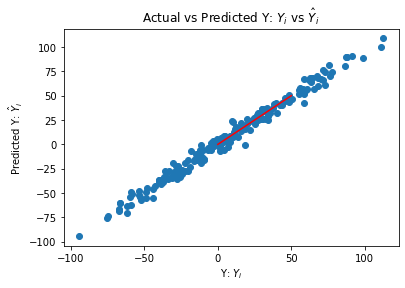

In [14]:
# Scatter plot of predicted values vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Y: $Y_i$')
plt.ylabel('Predicted Y: $\hat{Y}_i$')
plt.title('Actual vs Predicted Y: $Y_i$ vs $\hat{Y}_i$')

# Plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')